# Example halo-model power spectrum calculation
In this example, we will calculate the halo-model matter power spectrum.

In [1]:
import numpy as np
import pyccl as ccl
import pylab as plt
import math
%matplotlib inline

We begin by defining a set of cosmological parameters, as usual:

In [2]:
cosmo = ccl.Cosmology(Omega_c=0.27, Omega_b=0.045, h=0.67, A_s=2.1e-9, n_s=0.96, 
                      transfer_function='boltzmann_class',
                      matter_power_spectrum='halofit')

Note that we have explicitly defined how transfer functions should be calculated for the matter power spectrum, by using the `transfer_function` keyword argument. The following types of transfer function are available:

In [3]:
print(ccl.core.transfer_function_types.keys())

dict_keys(['none', 'emulator', 'fitting_function', 'eisenstein_hu', 'bbks', 'boltzmann', 'boltzmann_camb', 'camb', 'boltzmann_class', 'class'])


The default is `boltzmann_class`, which uses a full transfer function calculation from the CLASS Boltzmann code. This is highly accurate at the level for linear pertubation theory, but does not account for gravity at smaller scales in the late Universe where perturbations are not small and gravitational collapse begins to amplify.

Likewise, the `Cosmology()` object constructor also has a `matter_power_spectrum` argument that can be changed:

In [4]:
print(ccl.core.matter_power_spectrum_types.keys())

dict_keys(['halo_model', 'halomodel', 'halofit', 'linear', 'emu'])


The default is ```halofit```, but we could also use some other things. This defines what is output by the
```ccl.nonlin_matter_power``` function.

### Calculate the matter power spectrum
Now, let's calculate various different types of power spectra...

In [5]:
k = np.logspace(-4., 1., 100) # Wavenumber
a = 1. # Scale factor

pk_lin = ccl.linear_matter_power(cosmo, k, a)
pk_nl = ccl.nonlin_matter_power(cosmo, k, a)
pk_hm = ccl.halomodel_matter_power(cosmo, k, a)
pk_1h = ccl.onehalo_matter_power(cosmo, k, a)
pk_2h = ccl.twohalo_matter_power(cosmo, k, a)

...and make some plots:

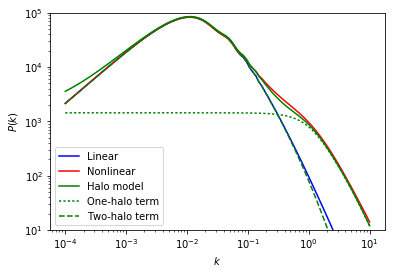

In [6]:
plt.plot(k, pk_lin, 'b-', label='Linear')
plt.plot(k, pk_nl, 'r-', label='Nonlinear')
plt.plot(k, pk_hm, 'g-', label='Halo model')
plt.plot(k, pk_1h, 'g:', label='One-halo term')
plt.plot(k, pk_2h, 'g--', label='Two-halo term')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$k$')
plt.ylabel(r'$P(k)$')
plt.ylim([1e1,1e5])
plt.legend()
plt.show()

Above we make a plot of the power spectrum from linear theory, nonlinear theory
(by default the HALOFIT fitting function in CCL) and the halo-model power spectrum.
We also plot the contribution from the one- and two-halo terms for the halo model, the total is the sum.
Visually we see that the halo model power looks quite similar to the model for the nonlinear power.
However, we note that the halo-model power underpredicts the power around the transition between the one-
and two-halo terms and also that there is a strange contribution from the one-halo term at extremely large scales.

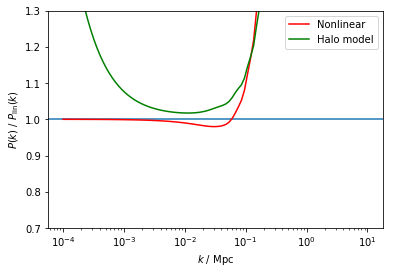

In [7]:
plt.axhline(1.)
plt.plot(k, pk_nl/pk_lin, 'r-', label='Nonlinear')
plt.plot(k, pk_hm/pk_lin, 'g-', label='Halo model')
plt.xscale('log')
plt.ylim([0.7,1.3])
plt.xlabel(r'$k$ / Mpc')
plt.ylabel(r'$P(k)$ / $P_\mathrm{lin}(k)$')
plt.legend()
plt.show()

Above we plot the ratio of the nonlinear and halo-model power to linear theory.
These curves diverge from the linear theory at the 10% level around k = 0.01 / Mpc.
We also see the problem with the halo model at very large scales where the one-halo term unphysically becomes
important for the power spectrum. This is a well-known problem with the fundamentals of the halo model
(see Cooray & Sheth 2002) and if you can think of a clever way to solve this issue you should publish it.

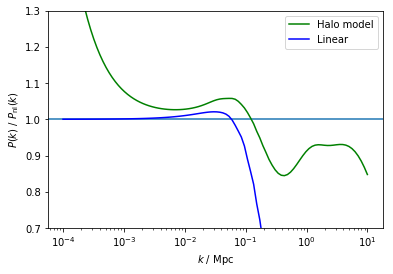

In [8]:
plt.axhline(1.)
plt.plot(k, pk_hm/pk_nl, 'g-', label='Halo model')
plt.plot(k, pk_lin/pk_nl, 'b-', label='Linear')
plt.xscale('log')
plt.ylim([0.7,1.3])
plt.xlabel(r'$k$ / Mpc')
plt.ylabel(r'$P(k)$ / $P_\mathrm{nl}(k)$')
plt.legend()
plt.show()

Above we plot the ratio of the halo-model and linear power compared to the nonlinear fitting function.
The fitting function matches accurate measurements from simulations at the ~5% level but we see that the
halo-model deviates from the fitting function by more than this amount. A particular problem is the lack of
power in the transition region between the one- and two-halo terms, which is around k = 0.3 in this plot.

We should not be surprised by this result, however. Many approximations go into the simple halo-model calculation
used here and the mismatch between the halo model and nonlinear theory is a result of these simplifications.
Still, the halo-model is useful approxmiate description of the power spectrum, so don't be too sad.